In [12]:
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
# 폰트설정 (맥)
from matplotlib import font_manager
plt.rcParams["font.family"] = 'NanumGothicCoding'
from matplotlib import rc
rc('font', family="Arial Unicode MS")

In [14]:
# 폰트 설정 (윈도우)
from matplotlib import rc

rc('font', family='Malgun Gothic')

# Data 불러오기

## 부동산(Train) Data

 <img src="./datas/data_source.png" style="width:100%;">

 <img src="./datas/csv.png" style="width:100%;">

In [15]:
train = pd.read_csv('datas/train.csv')

In [16]:
train['P/m^2'] = train['transaction_real_price']/train['exclusive_use_area'] # 평당가격 column 추가

In [18]:
train = train[['transaction_id', 'apartment_id', 'city',  'dong', 'jibun', 'apt',
               'addr_kr', 'exclusive_use_area', 'year_of_completion',
               'transaction_year_month', 'transaction_date', 'floor', 'P/m^2',
               'transaction_real_price']]

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 14 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  P/m^2                   1216553 non-null  float64
 13  transaction_real_price  1216553 non-null  int64  
dtypes:

## 공원 Data

In [20]:
park = pd.read_csv('datas/park.csv')
park.tail(50)

city   gu  dong   park_name park_type  park_area  \
1309  부산광역시  사상구   모라동    모라벤처타워공원       소공원      735.8   
1310  부산광역시  사상구   주례동        주감공원       소공원     1250.0   
1311  부산광역시  사상구   덕포동        문화공원      문화공원     3160.0   
1312  서울특별시  구로구  신도림동   미래사랑어린이공원     어린이공원     5870.0   
1313  서울특별시  구로구  신도림동    신도림역문화공원      문화공원     3322.0   
1314  서울특별시  구로구  신도림동    신도림어린이공원     어린이공원     2292.0   
1315  서울특별시  구로구   구로동     희망어린이공원     어린이공원      911.0   
1316  서울특별시  구로구   구로동    꿈마을어린이공원     어린이공원     1609.0   
1317  서울특별시  구로구   구로동    구로리어린이공원     어린이공원     7782.0   
1318  서울특별시  구로구   구로동     솔길어린이공원     어린이공원     1999.0   
1319  서울특별시  구로구   구로동     화원어린이공원     어린이공원     4544.0   
1320  서울특별시  구로구   구로동     삼각어린이공원     어린이공원     2634.0   
1321  서울특별시  구로구   구로동      구로근린공원      근린공원     7901.0   
1322  서울특별시  구로구   구로동     환경어린이공원     어린이공원      528.0   
1323  서울특별시  구로구   구로동     애경어린이공원     어린이공원     2996.0   
1324  서울특별시  구로구   구로동     테크노근린공원      근린공원    10482.0   
1325  서울특별시  구로구   구로동  구로동(다울)소공원       소공원      243.0   
1326  서울특별시  구로구   고척동    도레미어린이공원     어린이공원      326.0   
1327  서울특별시  구로구   고척동      계남근린공원      근린공원   158814.0   
1328  서울특별시  구로구   고척동      고척근린공원      근린공원   108120.0   
1329  서울특별시  구로구   고척동     골목어린이공원     어린이공원      266.0   
1330  서울특별시  구로구   고척동     능골어린이공원     어린이공원      357.0   
1331  서울특별시  구로구   고척동     오금어린이공원     어린이공원      348.0   
1332  서울특별시  구로구   고척동      덕의근린공원      근린공원     5565.0   
1333  서울특별시  구로구   고척동       현화소공원       소공원      720.0   
1334  서울특별시  구로구   고척동      무궁화소공원       소공원     1166.0   
1335  서울특별시  구로구   개봉동     개웅어린이공원     어린이공원     1797.0   
1336  서울특별시  구로구   개봉동    소막골어린이공원     어린이공원      516.0   
1337  서울특별시  구로구   개봉동     절골어린이공원     어린이공원      369.0   
1338  서울특별시  구로구   개봉동    가린열어린이공원     어린이공원      333.0   
1339  서울특별시  구로구   개봉동       개봉소공원       소공원     3023.0   
1340  서울특별시  구로구   개봉동       개웅소공원       소공원      657.0   
1341  서울특별시  구로구   오류동    온수도시자연공원        기타  1097565.0   
1342  서울특별시  구로구   오류동     개웅산근린공원      근린공원   411972.0   
1343  서울특별시  구로구   오류동   오동나무어린이공원     어린이공원     1815.0   
1344  서울특별시  구로구   온수동     온수어린이공원     어린이공원      475.0   
1345  서울특별시  구로구   온수동       와룡소공원       소공원     2500.0   
1346  서울특별시  구로구   온수동       갈매소공원       소공원     3200.0   
1347  서울특별시  구로구    궁동     삭새어린이공원     어린이공원     2077.0   
1348  서울특별시  구로구    궁동     수른어린이공원     어린이공원      332.0   
1349  서울특별시  구로구   천왕동    천왕도시자연공원        기타   587860.0   
1350  서울특별시  구로구   천왕동      연지근린공원      근린공원    44478.0   
1351  서울특별시  구로구   천왕동     버들어린이공원     어린이공원     6167.0   
1352  서울특별시  구로구   천왕동      천왕근린공원      근린공원    33677.0   
1353  서울특별시  구로구   천왕동      천왕역소공원       소공원     1712.0   
1354  서울특별시  구로구   천왕동   이펜시아어린이공원     어린이공원     1500.0   
1355  서울특별시  구로구   천왕동       개명소공원       소공원     5415.0   
1356  서울특별시  구로구   천왕동     봉화대근린공원      근린공원    60975.0   
1357  서울특별시  구로구    항동       푸른수목원      근린공원   100809.0   
1358  서울특별시  구로구   오류동    오류동역문화공원      문화공원     7510.0   

                                 park_exercise_facility  \
1309                                                NaN   
1310                                                NaN   
1311                                                NaN   
1312                                          체력단련시설 5점   
1313                                                NaN   
1314                                          체력단련시설 6점   
1315                                          체력단련시설 3점   
1316                                          체력단련시설 6점   
1317                                          체력단련시설 9점   
1318                                          체력단련시설 5점   
1319                                          체력단련시설 5점   
1320                                          체력단련시설 3점   
1321                                          체력단련시설 5점   
1322                                          체력단련시설 2점   
1323                                          체력단련시설 6점   
1324                                          체력단련시설 

In [21]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         1359 non-null   object 
 1   gu                           1356 non-null   object 
 2   dong                         1359 non-null   object 
 3   park_name                    1359 non-null   object 
 4   park_type                    1359 non-null   object 
 5   park_area                    1359 non-null   float64
 6   park_exercise_facility       277 non-null    object 
 7   park_entertainment_facility  435 non-null    object 
 8   park_benefit_facility        266 non-null    object 
 9   park_cultural_facitiy        72 non-null     object 
 10  park_facility_other          175 non-null    object 
 11  park_open_year               937 non-null    float64
 12  reference_date               1359 non-null   object 
dtypes: float64(2), obj

## 어린이집 Data

In [22]:
day_care = pd.read_csv('datas/day_care_center.csv')
day_care.tail(50)

city   gu day_care_name day_care_type  day_care_baby_num  teacher_num  \
7501  부산광역시  금정구        선재어린이집         법인·단체                 60         11.0   
7502  부산광역시  금정구        성산어린이집            민간                 45         11.0   
7503  부산광역시  금정구        성심어린이집            민간                 70         12.0   
7504  부산광역시  금정구        수연어린이집            민간                 64         11.0   
7505  부산광역시  금정구        숲속어린이집            민간                 27          8.0   
7506  부산광역시  금정구       신나라어린이집            민간                 27          5.0   
7507  부산광역시  금정구        신동어린이집            가정                 19          6.0   
7508  부산광역시  금정구        신명어린이집            가정                 20          6.0   
7509  부산광역시  금정구      쌍용예가어린이집            민간                 47         10.0   
7510  부산광역시  금정구      씨드키즈어린이집            가정                 19          5.0   
7511  부산광역시  금정구      씨엠에스어린이집            가정                 20          4.0   
7512  부산광역시  금정구      아이누리어린이집            민간                 68         11.0   
7513  부산광역시  금정구      아이미래어린이집            민간                 46         14.0   
7514  부산광역시  금정구      아이성 어린이집            가정                 20          6.0   
7515  부산광역시  금정구       아이원어린이집            민간                127         24.0   
7516  부산광역시  금정구     아이자람터어린이집            민간                 54         13.0   
7517  부산광역시  금정구       엄마랑어린이집            민간                 49         11.0   
7518  부산광역시  금정구        엘지어린이집            가정                 19          5.0   
7519  부산광역시  금정구        영광어린이집            가정                 19          2.0   
7520  부산광역시  금정구      영재타운어린이집            민간                101         18.0   
7521  부산광역시  금정구        영화어린이집            민간                 49         10.0   
7522  부산광역시  금정구       예가람어린이집            민간                 40          7.0   
7523  부산광역시  금정구        예뜰어린이집            가정                 20          6.0   
7524  부산광역시  금정구       옹달샘어린이집            민간                 41          9.0   
7525  부산광역시  금정구      우성그린어린이집            민간                 61          8.0   
7526  부산광역시  금정구        우성어린이집            가정                 19          4.0   
7527  부산광역시  금정구        우신어린이집            가정                 19          5.0   
7528  부산광역시  금정구        유정어린이집            가정                 20          6.0   
7529  부산광역시  금정구        이레어린이집            민간                 24          4.0   
7530  부산광역시  금정구    장전제일교회어린이집            민간                 79         11.0   
7531  부산광역시  금정구        지산어린이집            민간                 57          9.0   
7532  부산광역시  금정구      참조은 어린이집            가정                 19          7.0   
7533  부산광역시  금정구       참초롱어린이집            민간                 39         10.0   
7534  부산광역시  금정구        초록어린이집            가정                 20          7.0   
7535  부산광역시  금정구      크레파스어린이집            민간                 35          9.0   
7536  부산광역시  금정구        튼튼어린이집            가정                 20          3.0   
7537  부산광역시  금정구       파랑새어린이집            가정                 20          4.0   
7538  부산광역시  금정구      푸른하늘어린이집            가정                 19          5.0   
7539  부산광역시  금정구      하늘빛 어린이집            민간                 49         11.0   
7540  부산광역시  금정구       하늘샘어린이집            민간                 46          7.0   
7541  부산광역시  금정구        한별어린이집            민간                 46          9.0   
7542  부산광역시  금정구        한신어린이집            가정                 19          6.0   
7543  부산광역시  금정구        한울어린이집            민간                 36          5.0   
7544  부산광역시  금정구       해맑은어린이집            민간                 78         18.0   
7545  부산광역시  금정구       해무리어린이집        사회복지법인                 48         14.0   
7546  부산광역시  금정구      해바라기어린이집            민간                 46         13.0   
7547  부산광역시  금정구        해수어린이집            가정                 19          6.0   
7548  부산광역시  금정구   행복한그림동산어린이집            민간                 92         16.0   
7549  부산광역시  금정구       행복한어린이집            민간                 43         12.0   
7550  부

In [23]:
day_care.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7551 entries, 0 to 7550
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  7551 non-null   object 
 1   gu                    7551 non-null   object 
 2   day_care_name         7551 non-null   object 
 3   day_care_type         7551 non-null   object 
 4   day_care_baby_num     7551 non-null   int64  
 5   teacher_num           7326 non-null   float64
 6   nursing_room_num      4352 non-null   float64
 7   playground_num        3626 non-null   float64
 8   CCTV_num              5280 non-null   float64
 9   is_commuting_vehicle  7055 non-null   object 
 10  reference_date        7551 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 649.0+ KB


## 동별 실가격 정보 내림차순으로 정렬

In [24]:
df1 = pd.DataFrame(train, columns=['city', 'dong', 'transaction_real_price','transaction_id','apartment_id','jibun',
                                  'apt','addr_kr', 'exclusive_use_area', 'year_of_completion', 'transaction_year_month',
                                  'transaction_date', 'floor', 'P/m^2'])

In [25]:
citi_dong_data = df1["transaction_real_price"].\
    groupby([df1['city'], df1['dong']]).agg(
        ['mean', 'std', 'min', 'max', 'count'])

((citi_dong_data['count'].sort_values(ascending=False)).reset_index()).head(10)

city dong  count
0  서울특별시  상계동  29346
1  부산광역시   좌동  23255
2  부산광역시  화명동  21511
3  부산광역시  용호동  17398
4  서울특별시  중계동  17079
5  서울특별시  신정동  16902
6  부산광역시  연산동  16365
7  부산광역시  다대동  15586
8  서울특별시   창동  15474
9  서울특별시  구로동  14372

In [26]:
train[train['dong']=='상계동']

transaction_id  apartment_id   city dong jibun         apt  \
176296           176296           816  서울특별시  상계동  1321          건영   
176297           176297          4617  서울특별시  상계동  1265      미주동방벽운   
176298           176298          5950  서울특별시  상계동   626  상계주공14(고층)   
176299           176299         11486  서울특별시  상계동   995        한신4차   
176300           176300          5947  서울특별시  상계동   652  상계주공11(고층)   
...                 ...           ...    ...  ...   ...         ...   
1127493         1130995          5039  서울특별시  상계동   639       보람2단지   
1127494         1130996          5952  서울특별시  상계동   624  상계주공16(고층)   
1127495         1130997          5950  서울특별시  상계동   626  상계주공14(고층)   
1127496         1130998          5943  서울특별시  상계동   765   상계주공1(고층)   
1127497         1130999          5947  서울특별시  상계동   652  상계주공11(고층)   

                    addr_kr  exclusive_use_area  year_of_completion  \
176296          상계동 1321 건영               59.91                2003   
176297      상계동 1265 미주동방벽운              114.92                2000   
176298   상계동 626 상계주공14(고층)               45.90                1989   
176299         상계동 995 한신4차               84.84                1995   
176300   상계동 652 상계주공11(고층)               59.28                1988   
...                     ...                 ...                 ...   
1127493       상계동 639 보람2단지               68.99                1988   
1127494  상계동 624 상계주공16(고층)               45.77                1988   
1127495  상계동 626 상계주공14(고층)               45.90                1989   
1127496   상계동 765 상계주공1(고층)               41.30                1988   
1127497  상계동 652 상계주공11(고층)               58.01                1988   

         transaction_year_month transaction_date  floor       P/m^2  \
176296                   200801             1~10      6  292.104824   
176297                   200801             1~10     10  513.400627   
176298                   200801             1~10      1  274.509804   
176299                   200801             1~10      6  338.873173   
176300                   200801             1~10      6  354.251012   
...                         ...              ...    ...         ...   
1127493                  201711            21~30     10  500.072474   
1127494                  201711            21~30     10  535.285121   
1127495                  201711            21~30     11  490.196078   
1127496                  201711            21~30      1  581.113801   
1127497                  201711            21~30      5  672.297880   

         transaction_real_price  
176296                    17500  
176297                    59000  
176298                    12600  
176299                    28750  
176300                    21000  
...                         ...  
1127493                   34500  
1127494                   24500  
1127495                   22500  
1127496                   24000  
1127497                   39000  

[29346 rows x 14 columns]

## Heatmap을 이용해 상관관계 분석

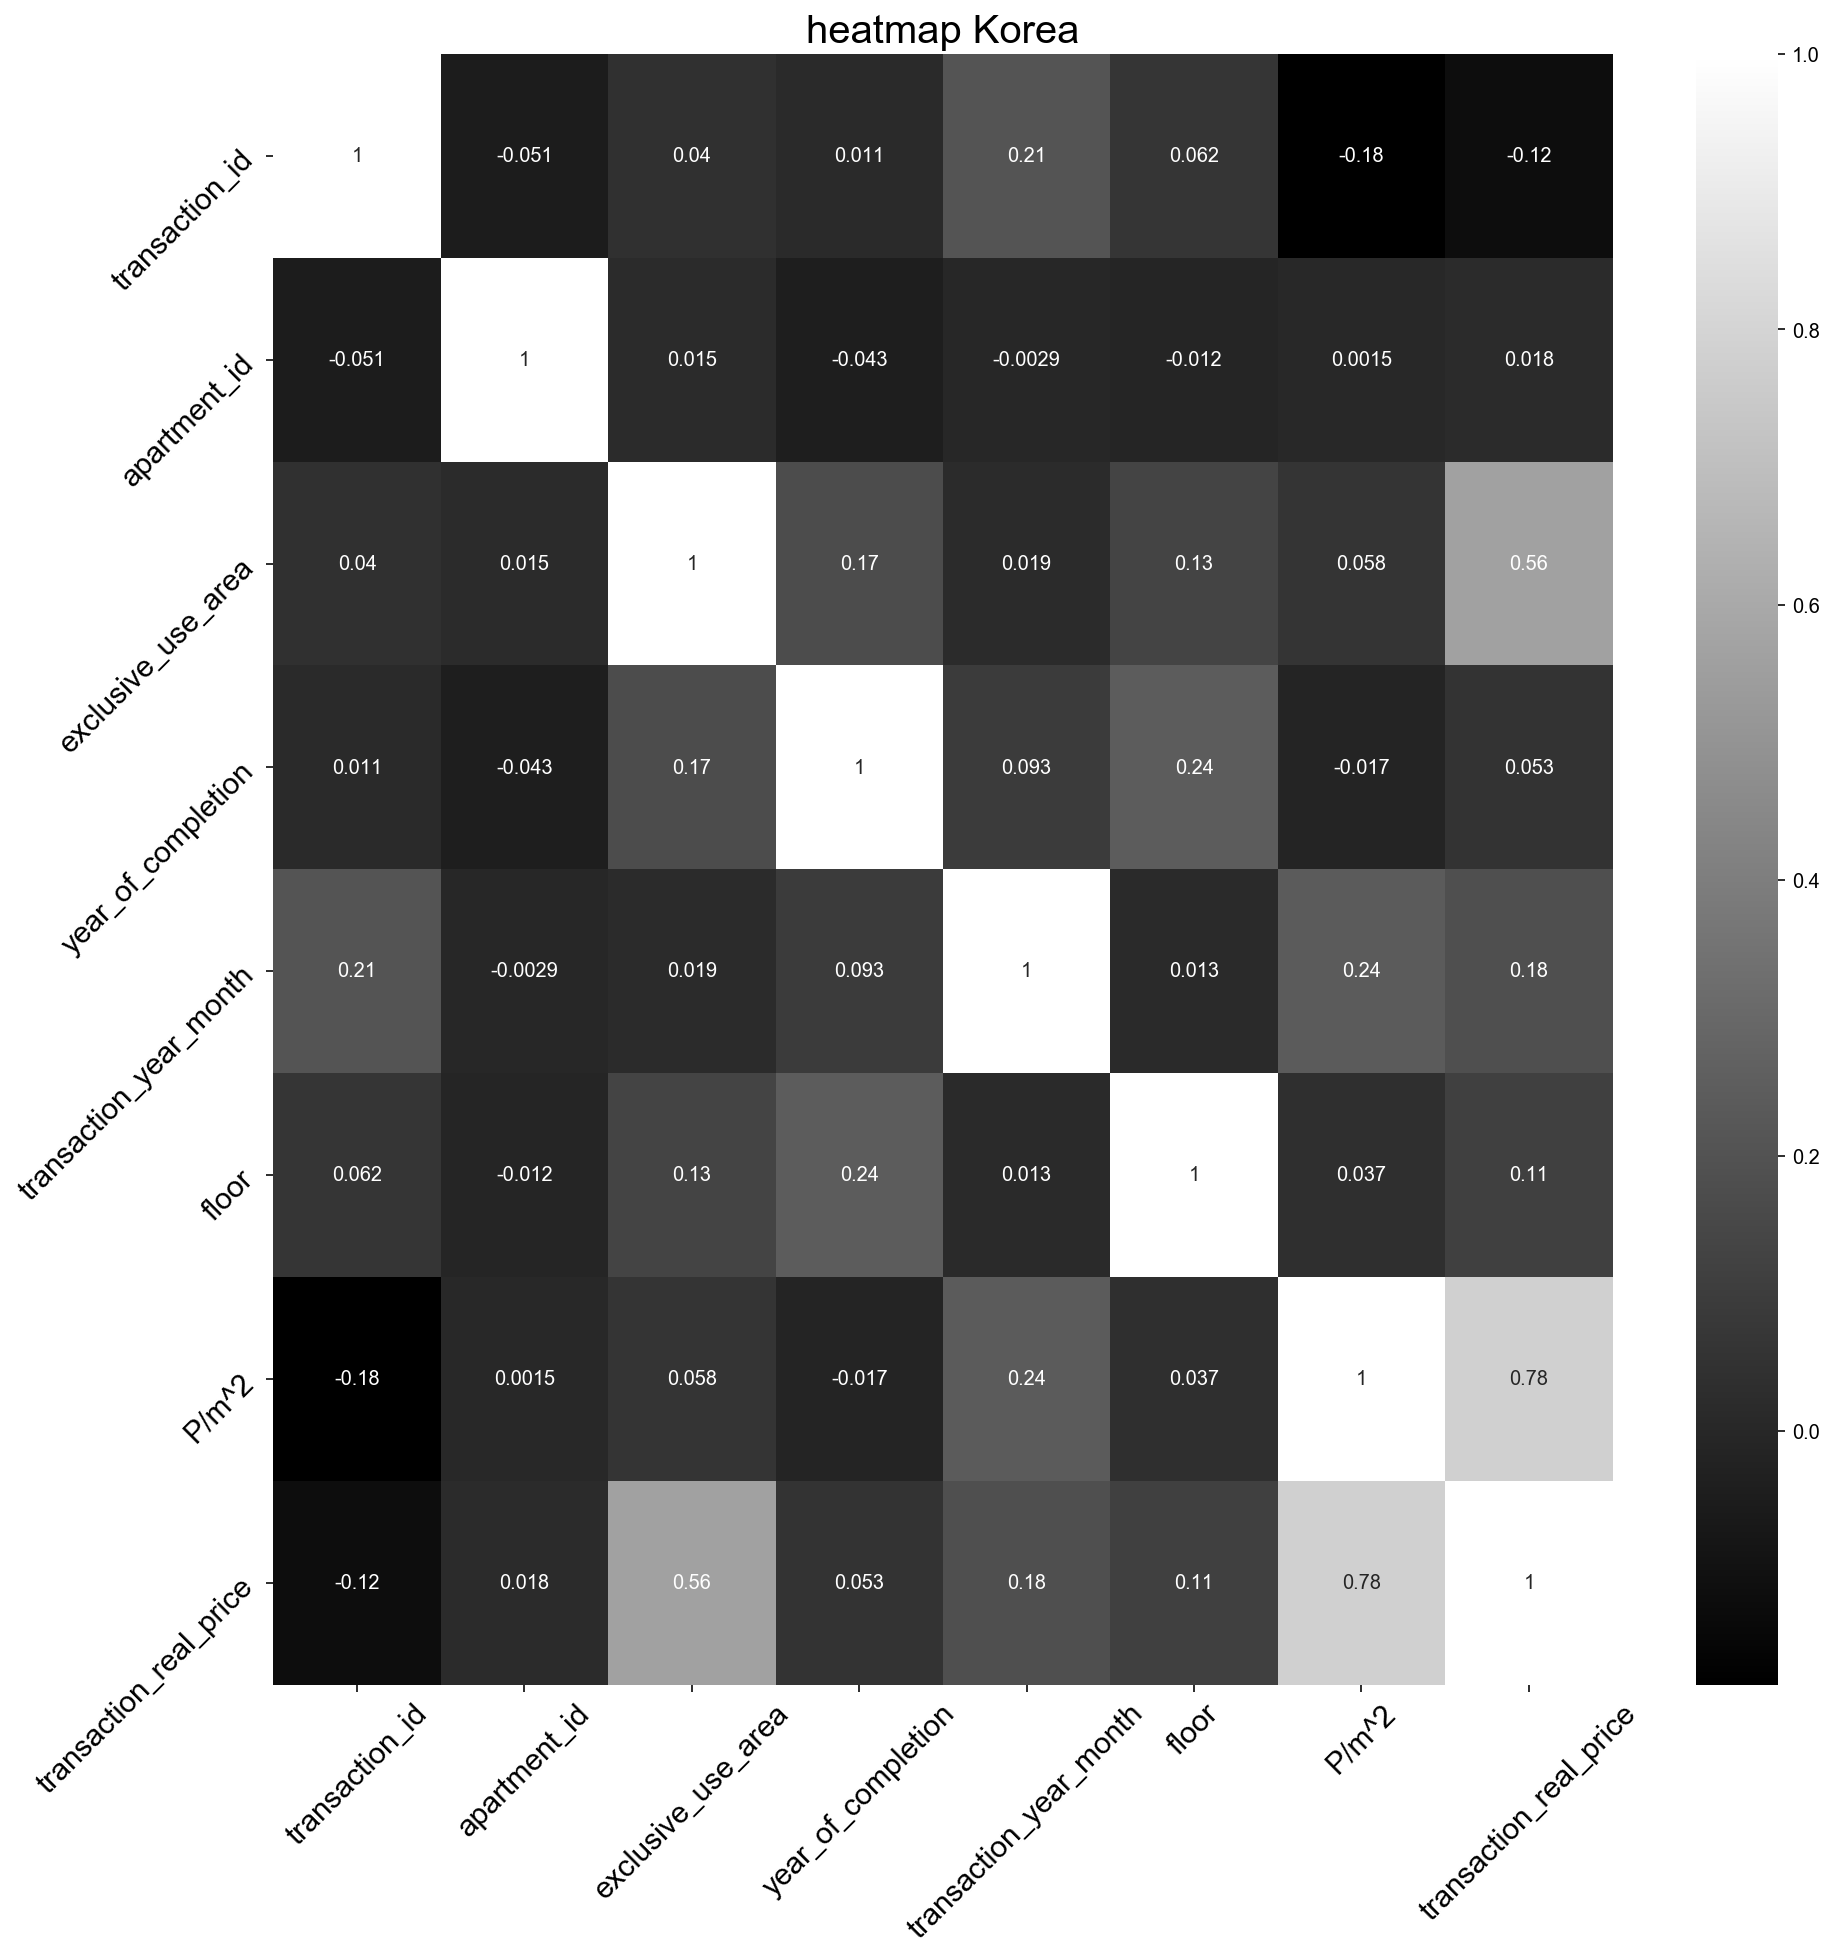

In [27]:
plt.figure(figsize=(15, 15))
sns.heatmap(train.corr(), cmap="gray", annot=True)
plt.title('heatmap Korea', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.show()

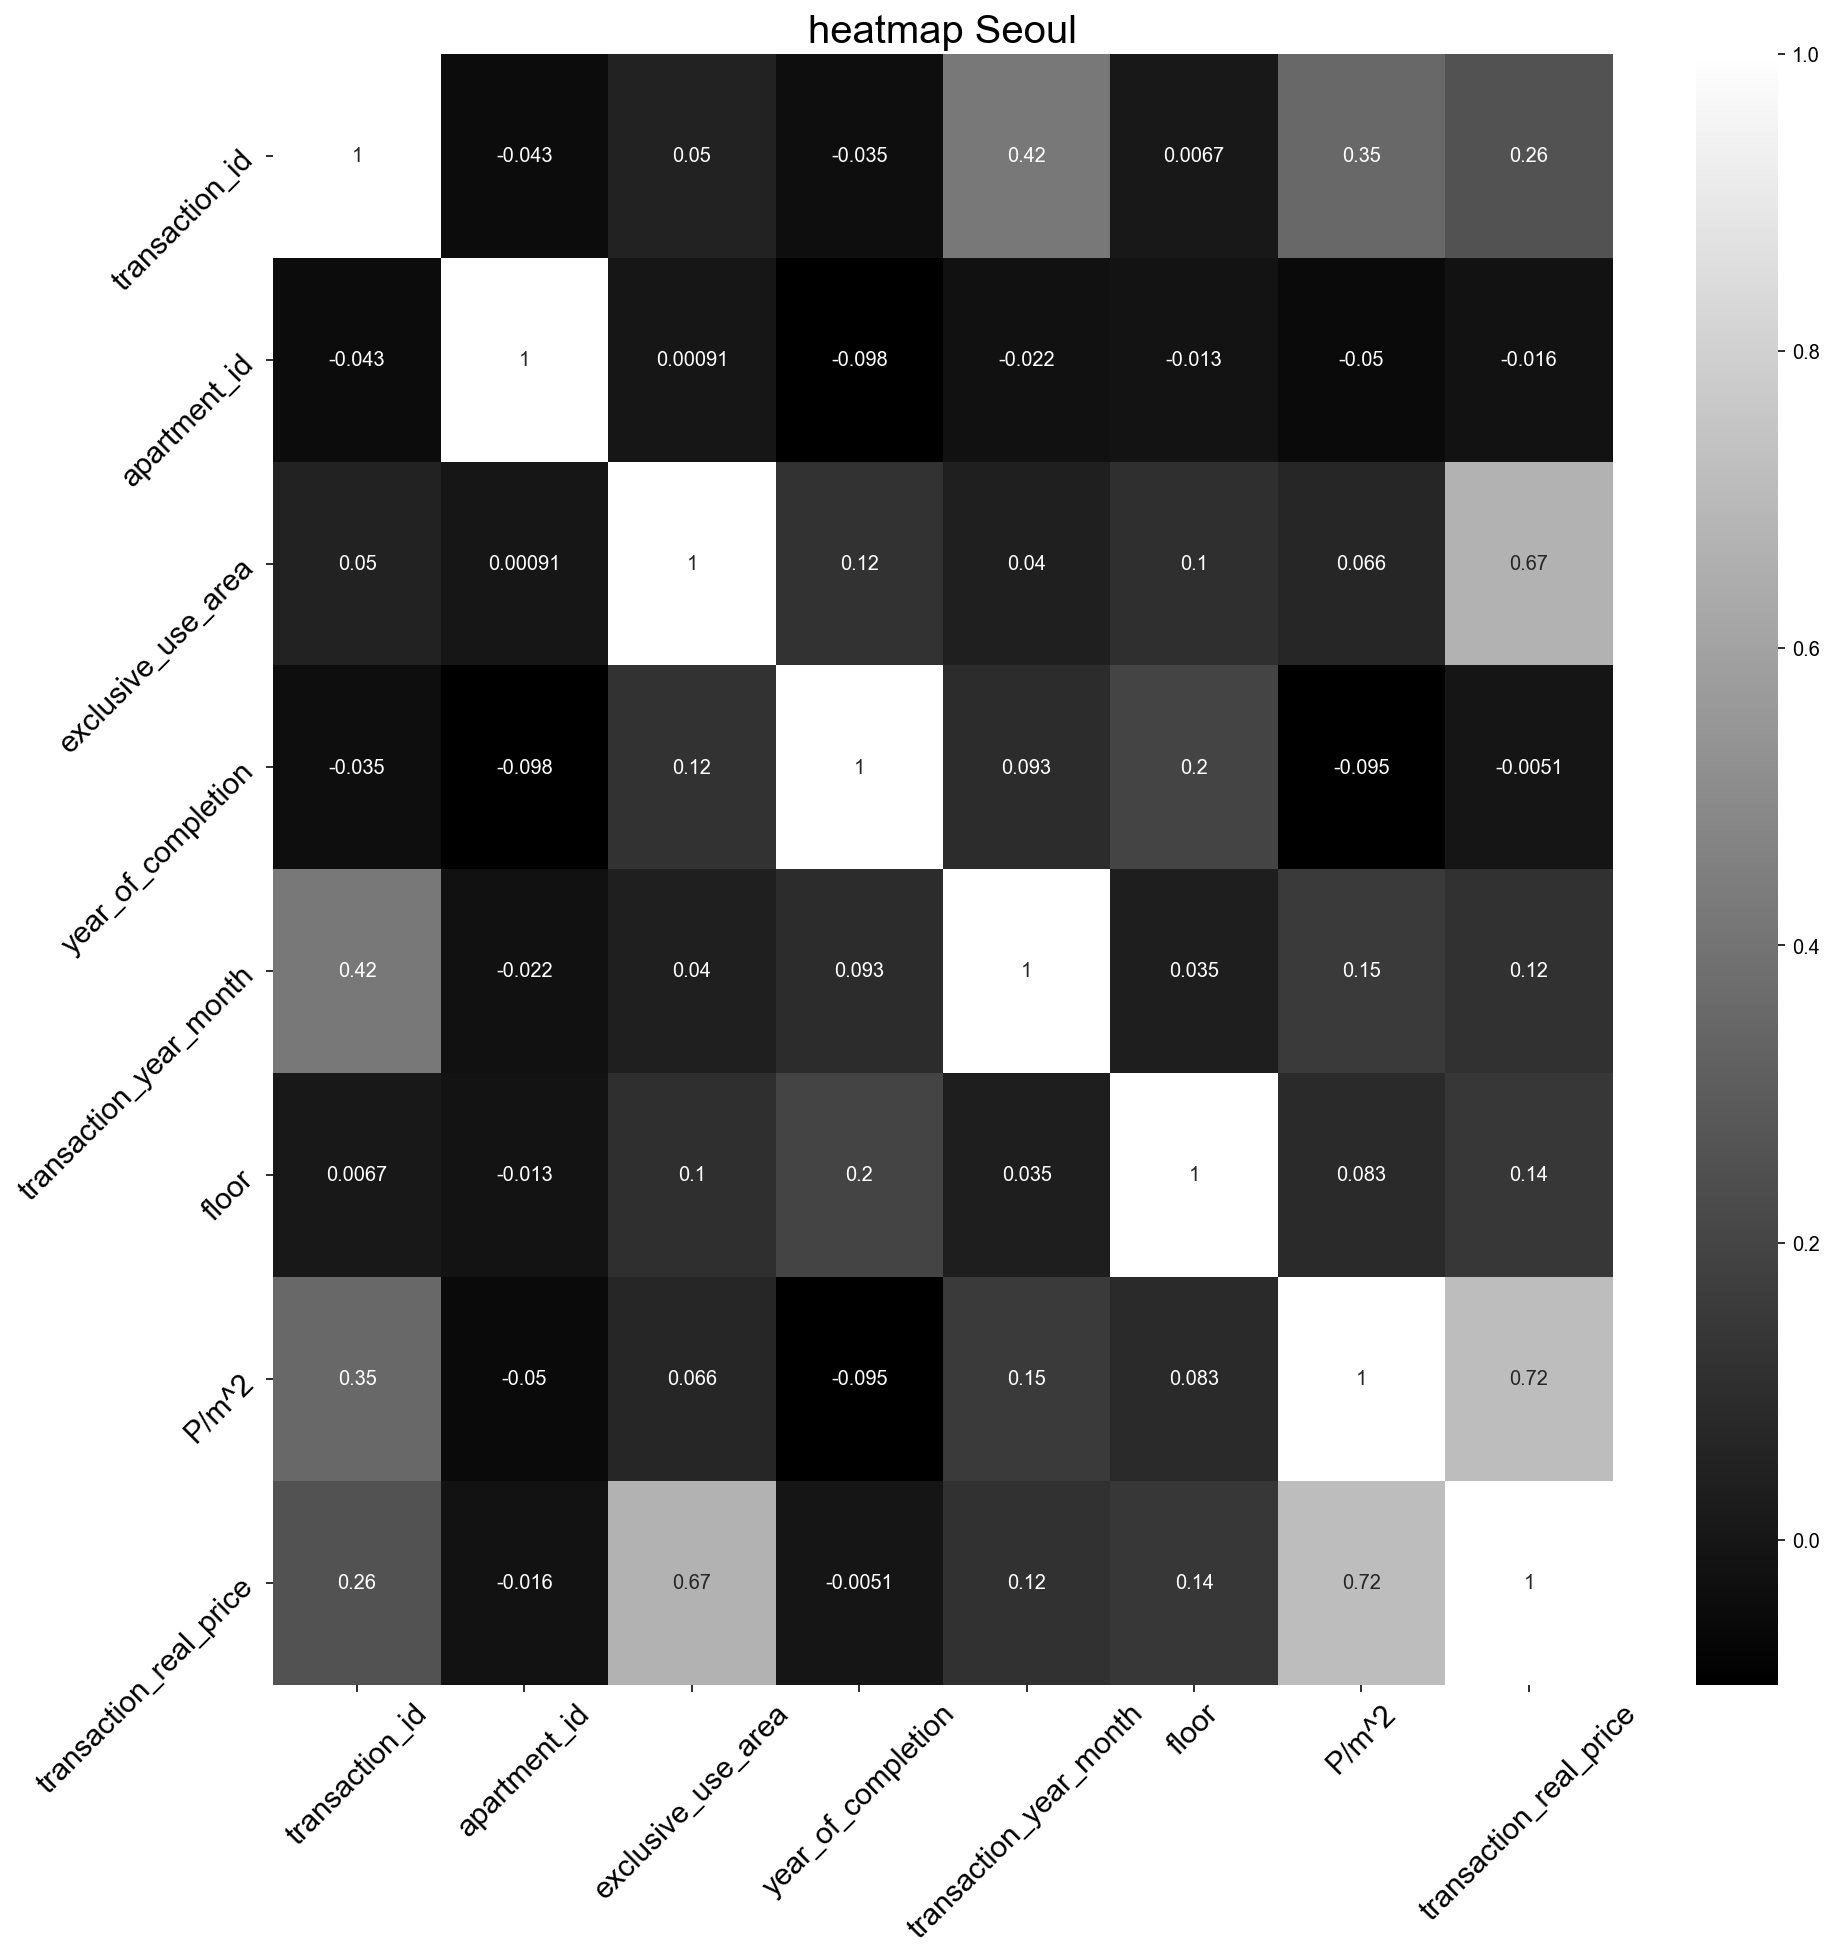

In [28]:
plt.figure(figsize=(15, 15))
sns.heatmap(train[train['city'] == '서울특별시'].corr(), cmap="gray", annot=True)
plt.title('heatmap Seoul', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.show()

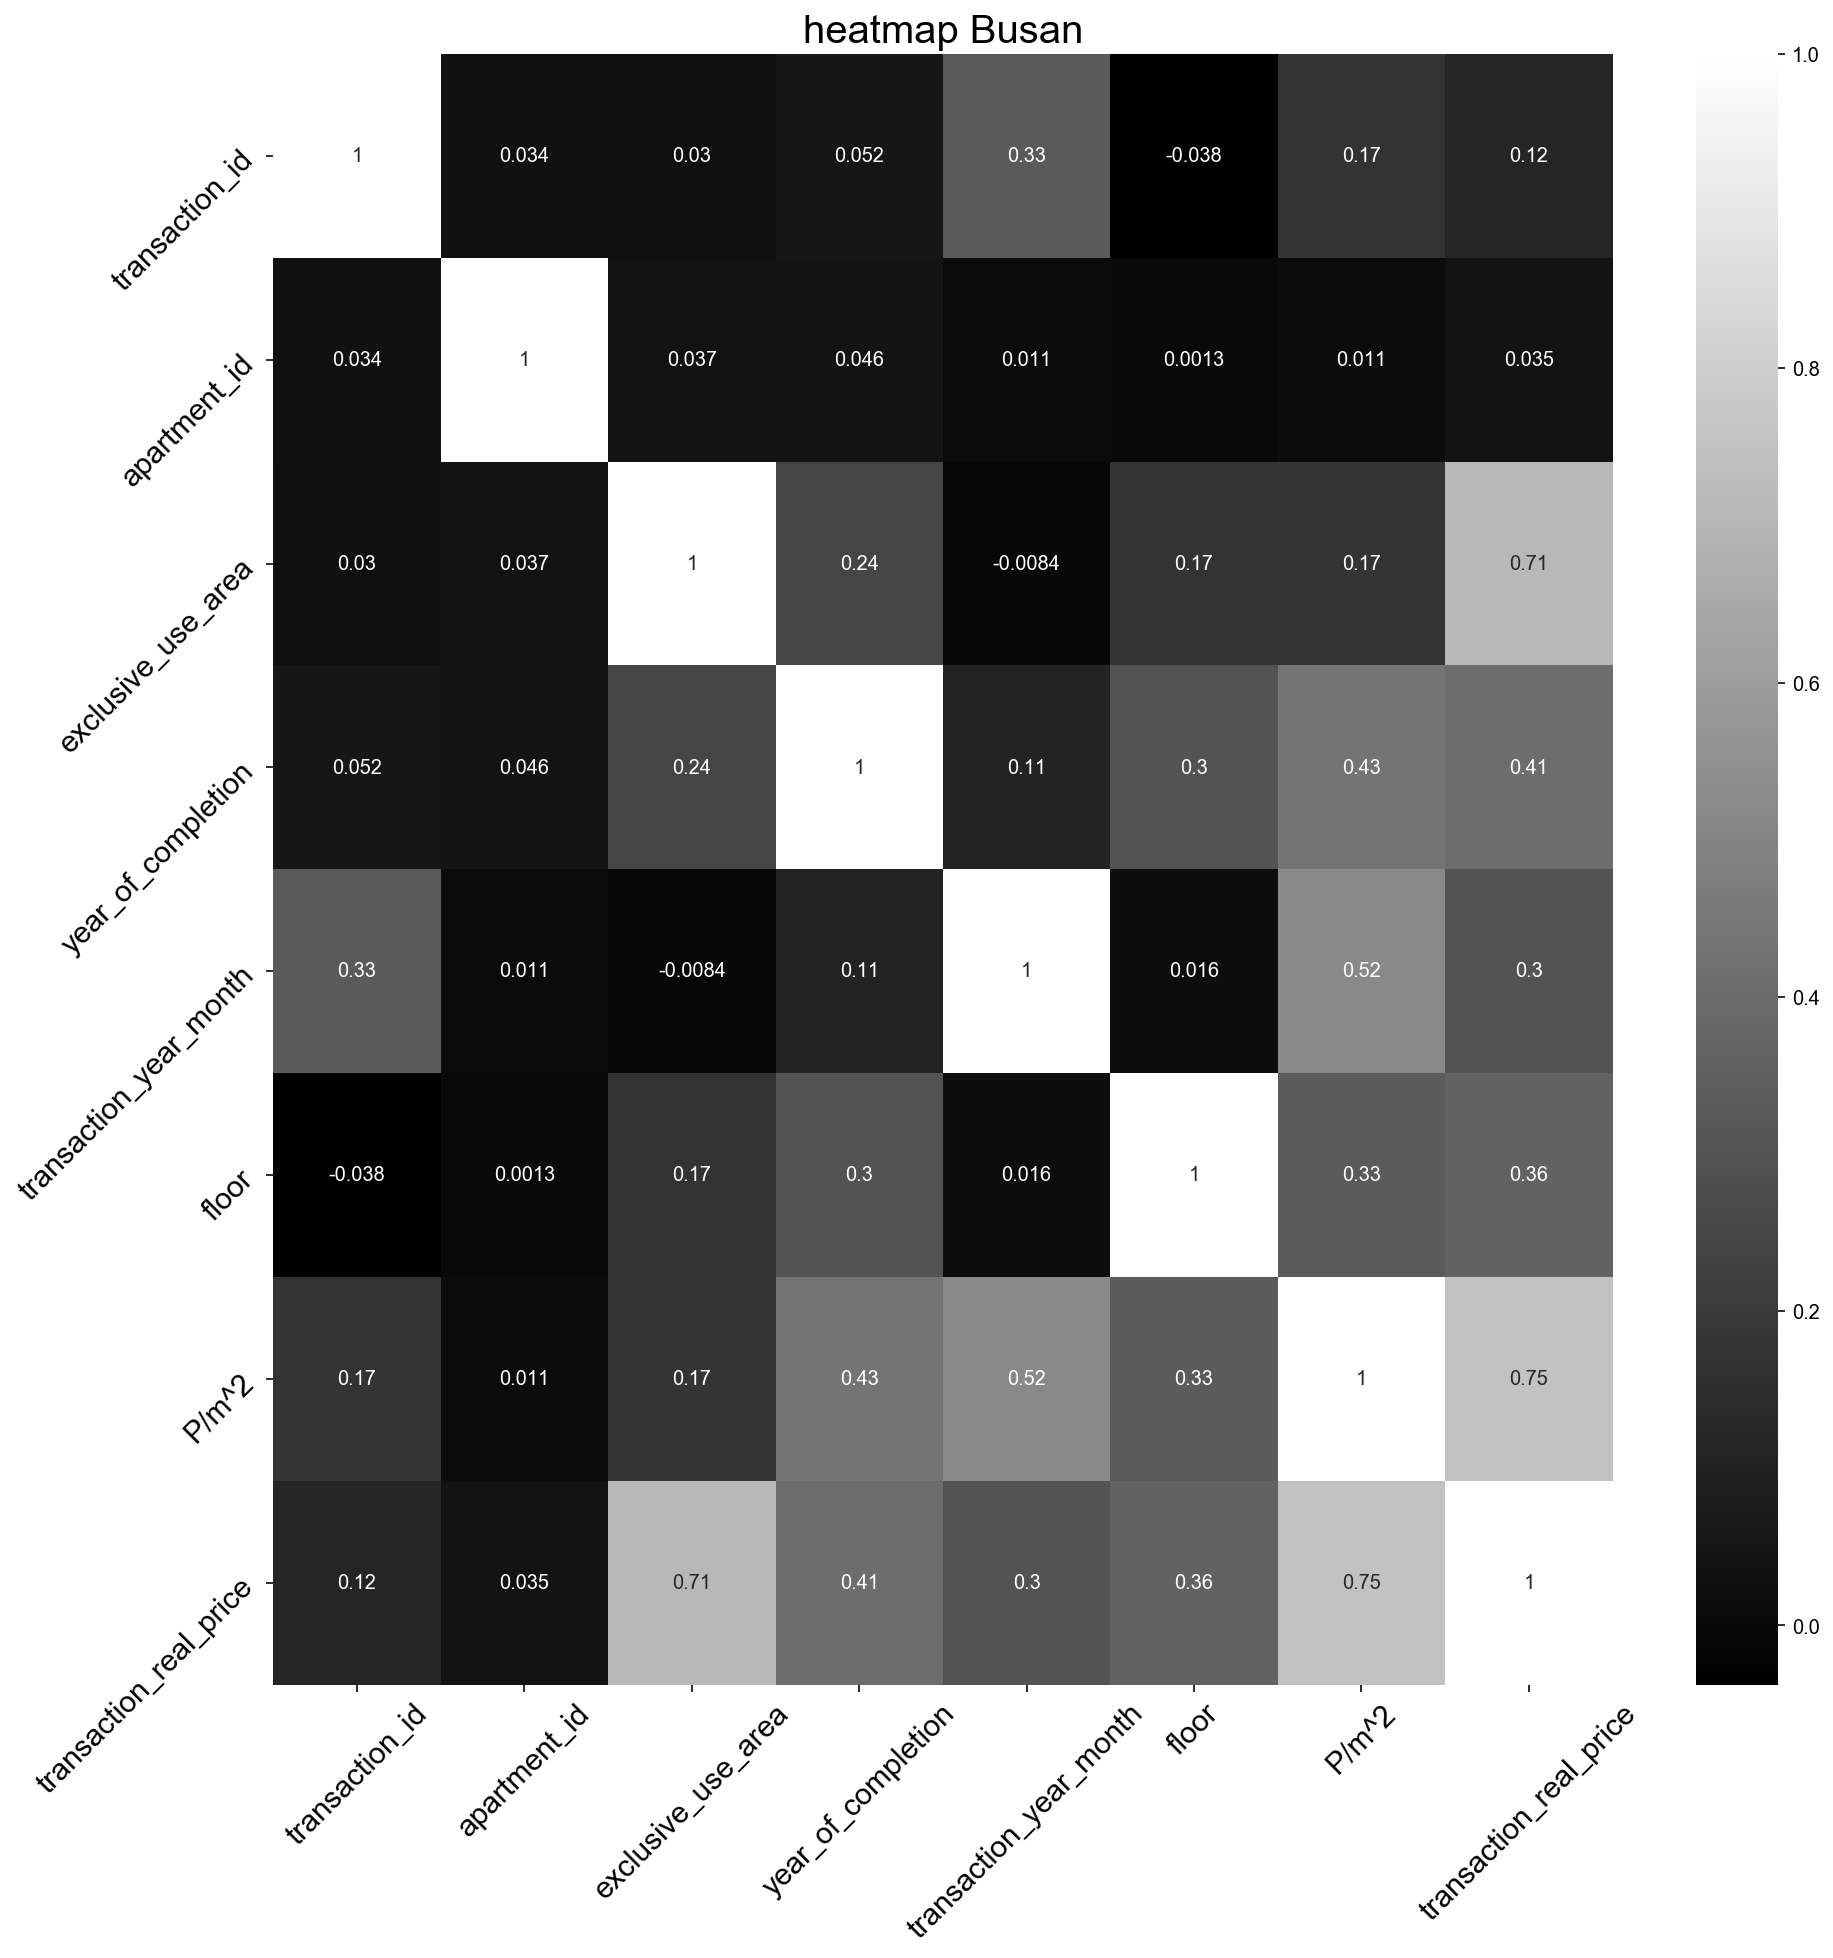

In [29]:
plt.figure(figsize=(15, 15))
sns.heatmap(train[train['city'] == '부산광역시'].corr(), cmap="gray", annot=True)
plt.title('heatmap Busan', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.show()

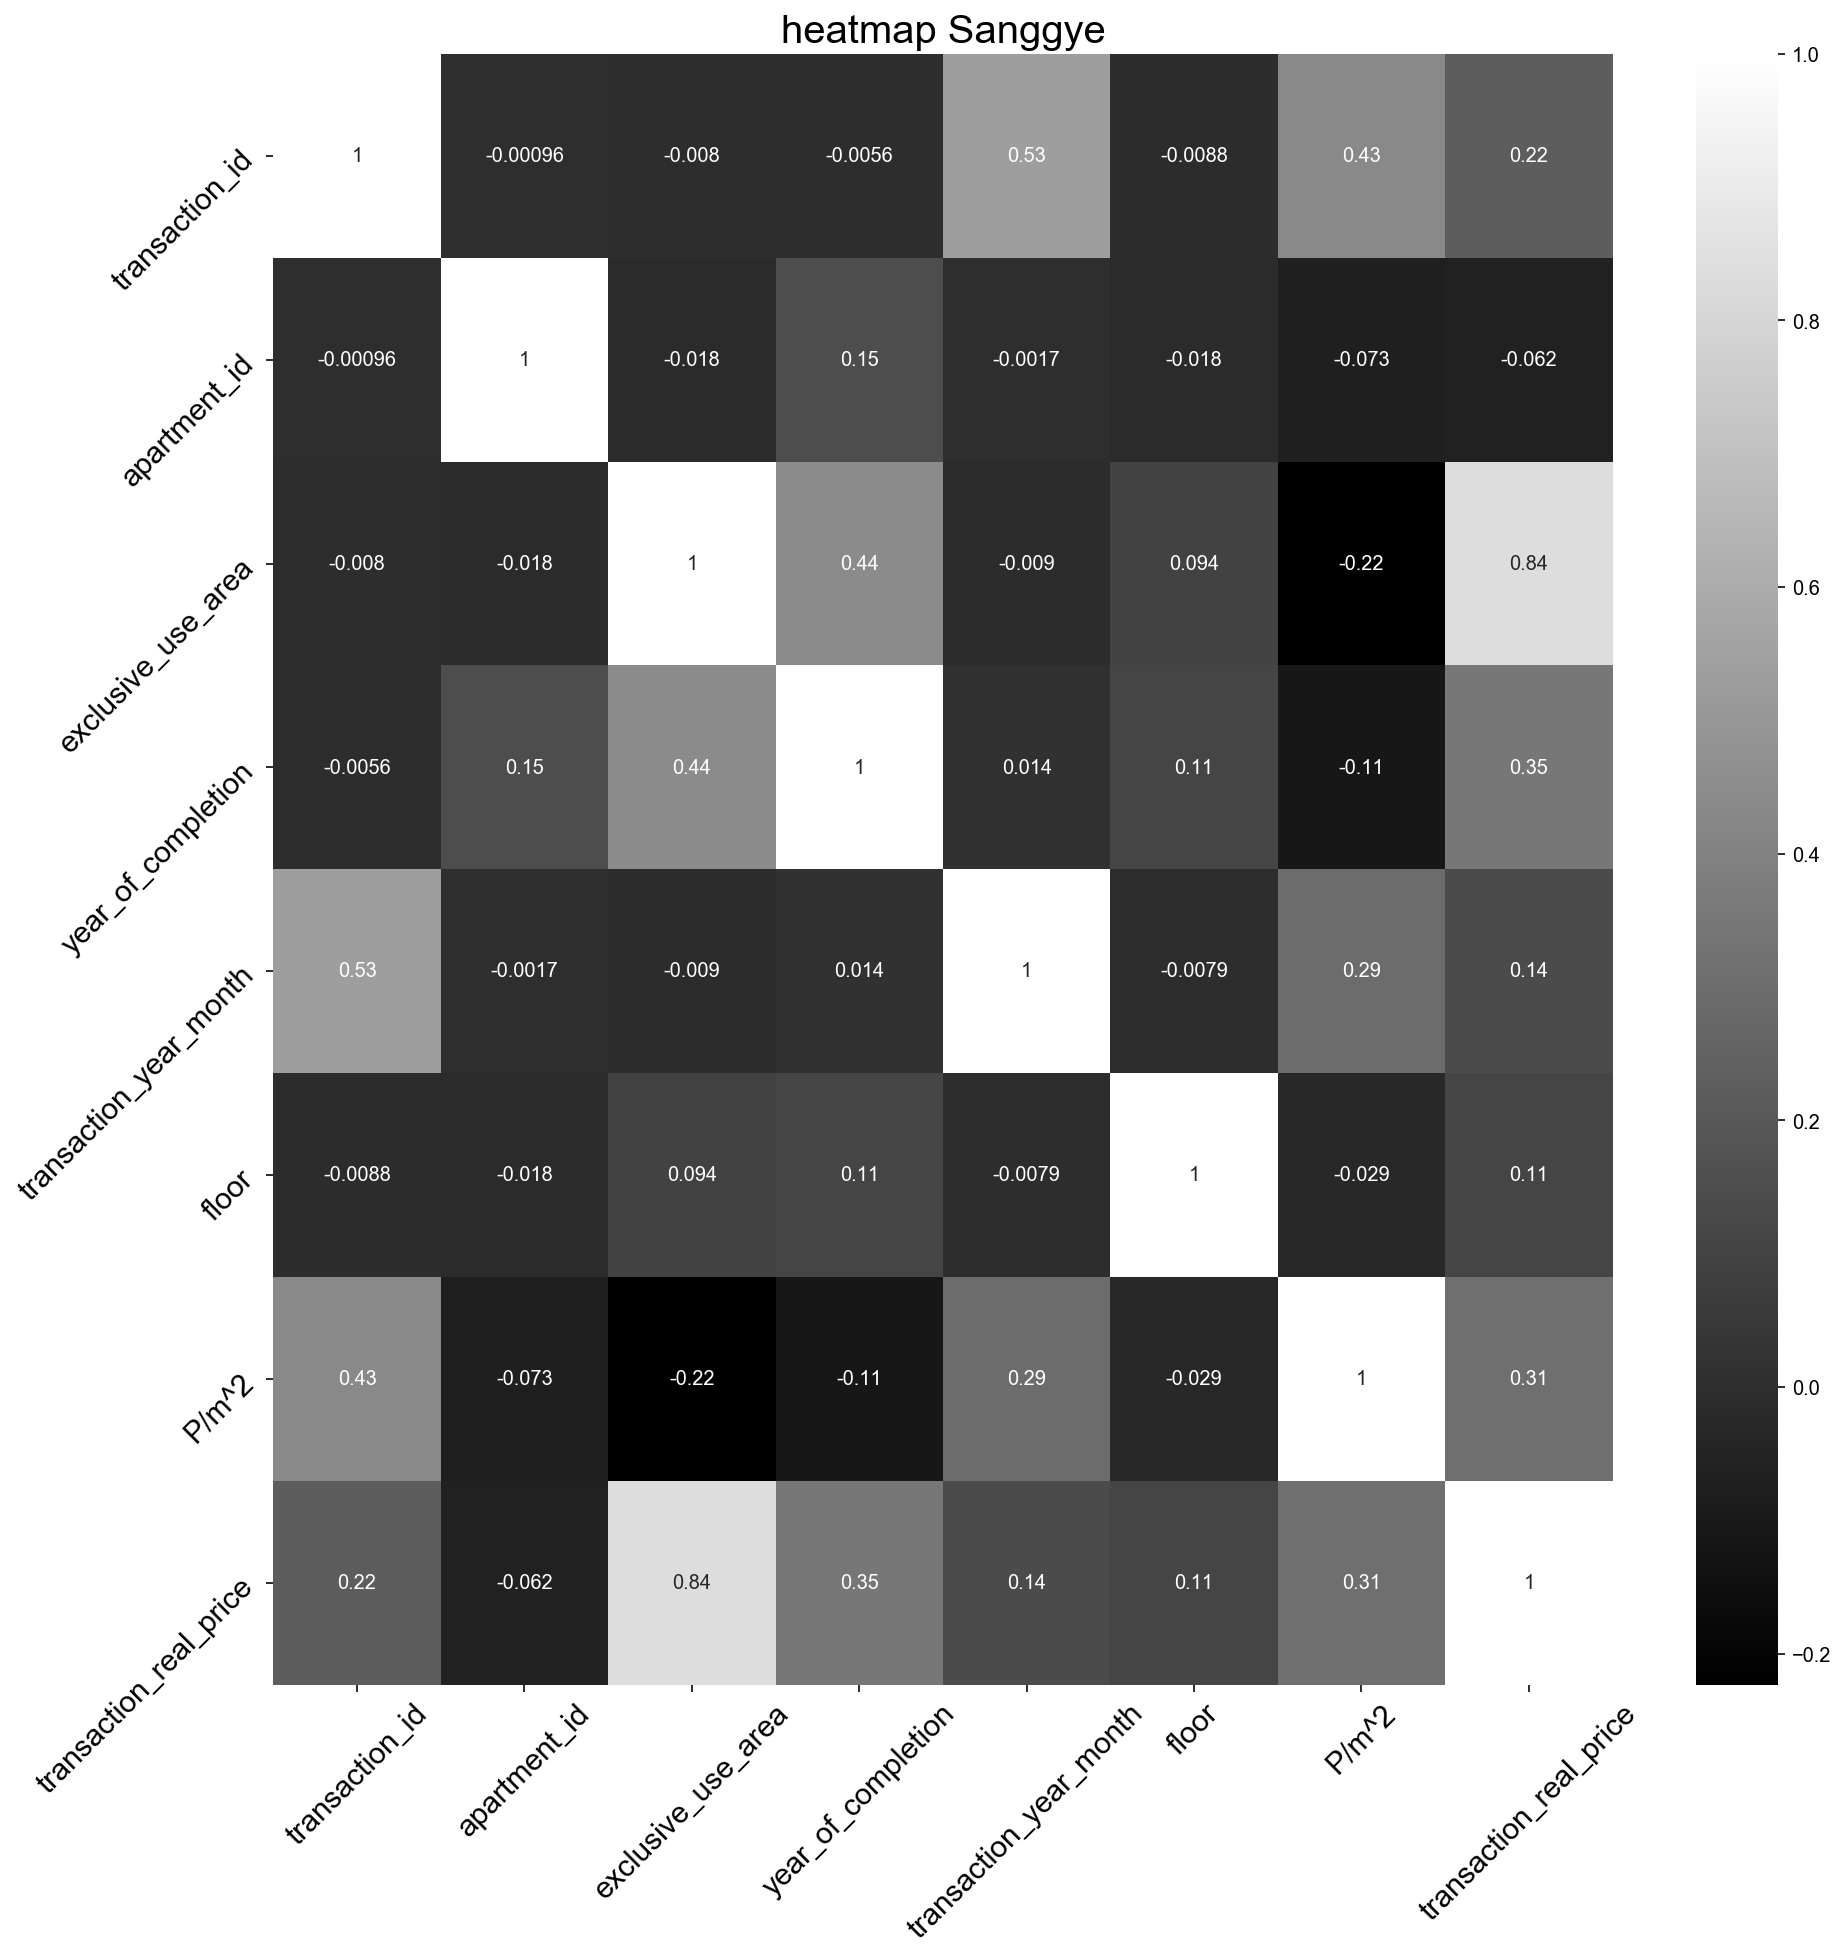

In [30]:
plt.figure(figsize=(15, 15))
sns.heatmap(train[train['dong'] == '상계동'].corr(), cmap="gray", annot=True)
plt.title('heatmap Sanggye', fontsize=20)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=45, fontsize=15)
plt.show()

In [31]:
s_pivot = pd.pivot_table(df1, index=["city","dong"],values=["transaction_real_price"], aggfunc = ['mean','median','min','max','sum','count'])
s_pivot.xs('서울특별시')

mean                 median                    min  \
     transaction_real_price transaction_real_price transaction_real_price   
dong                                                                        
가락동            54967.955681                54000.0                   1500   
가리봉동           24241.186441                25000.0                  13000   
가산동            26812.244082                27300.0                   8889   
가양동            32263.930082                29000.0                  10000   
갈월동            48662.500000                51500.0                  30000   
...                     ...                    ...                    ...   
효창동            51399.878378                48000.0                  14500   
후암동            49870.036496                45750.0                   8000   
휘경동            34295.183976                34800.0                   9091   
흑석동            63784.781627                64500.0                  16942   
흥인동            74039.456432                79558.0                  13600   

                        max                    sum                  count  
     transaction_real_price transaction_real_price transaction_real_price  
dong                                                                       
가락동                  131500              525878432                   9567  
가리봉동                  32300                1430230                     59  
가산동                   58450               32844999                   1225  
가양동                  115000              213651745                   6622  
갈월동                   63000                 389300                      8  
...                     ...                    ...                    ...  
효창동                  123000               22821546                    444  
후암동                  120000               13664390                    274  
휘경동                   64500               92459816                   2696  
흑석동                  294994              163863104                   2569  
흥인동                  228977               17843509                    241  

[330 rows x 6 columns]

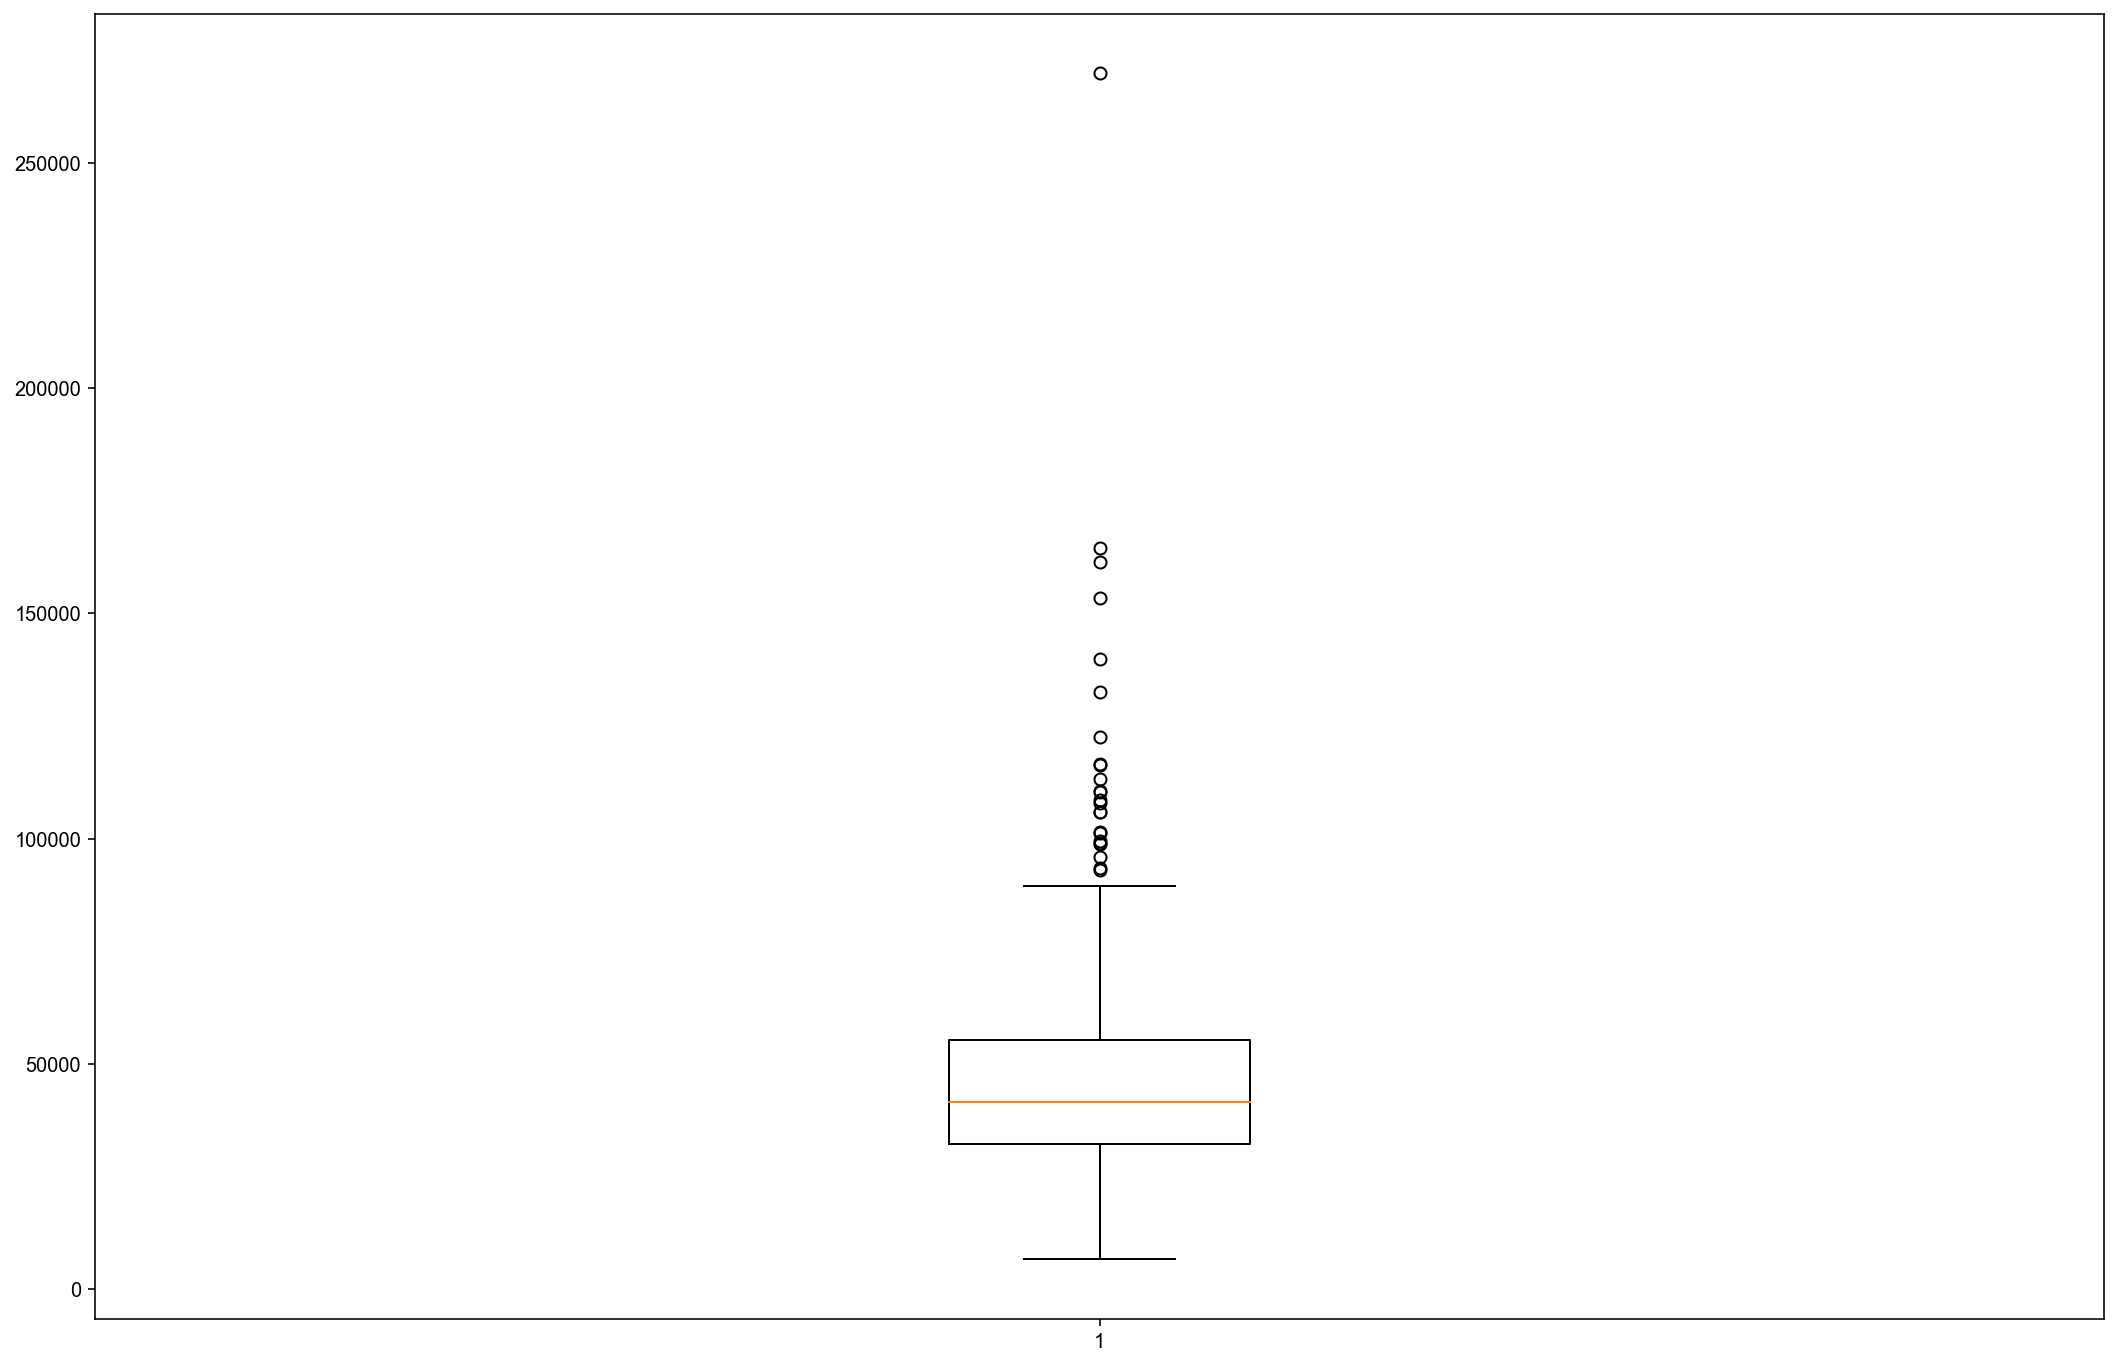

In [32]:
plt.figure(figsize=(18,12))
plt.boxplot(s_pivot.xs('서울특별시')["mean"])
plt.show()

 <img src="./datas/pieris.png" style="width:30%;">

In [33]:
groupby_min = pd.DataFrame(df1.groupby("dong").transaction_real_price.min())
groupby_min.rename(columns={'transaction_real_price' : 'min'}, inplace=True)

In [34]:
groupby_max = pd.DataFrame(df1.groupby("dong").transaction_real_price.max())
groupby_max.rename(columns={'transaction_real_price' : 'max'}, inplace=True)

In [35]:
groupby_mean = pd.DataFrame(df1.groupby("dong").transaction_real_price.mean())
groupby_mean.rename(columns={'transaction_real_price' : 'mean'}, inplace=True)

In [36]:
groupby_std = pd.DataFrame(df1.groupby("dong").transaction_real_price.std())
groupby_std.rename(columns={'transaction_real_price' : 'std'}, inplace=True)

In [37]:
groupby_count = pd.DataFrame(df1.groupby("dong").transaction_real_price.count())

In [51]:
groupby_df1 = pd.concat([groupby_max, groupby_mean, groupby_min], axis=1)

In [52]:
groupby_df1['count'] = groupby_count

In [53]:
groupby_df1['Score_squareroot']=np.sqrt((groupby_df1['count']))

In [54]:
groupby_std = pd.DataFrame(df1.groupby("dong").transaction_real_price.std())
groupby_std.rename(columns={'transaction_real_price' : 'std'}, inplace=True)

In [55]:
groupby_df1['Score_squareroot']=np.sqrt((groupby_df1['count']))

In [56]:
groupby_df1 = pd.concat([groupby_max, groupby_mean, groupby_min, groupby_std], axis=1)

In [57]:
groupby_df1['sort'] = groupby_df1['max'] - groupby_df1['min']

In [58]:
groupby_count = pd.DataFrame(df1.groupby("dong").transaction_real_price.count())

In [59]:
groupby_df1['count'] = groupby_count
groupby_df1['Score_squareroot']=np.sqrt((groupby_df1['count']))

In [60]:
low = groupby_df1['mean'] - 1.96 * (groupby_df1['std']/(groupby_df1['Score_squareroot']))
high = groupby_df1['mean'] + 1.96 * (groupby_df1['std']/(groupby_df1['Score_squareroot']))

In [61]:
low_95 = pd.DataFrame(low)
high_95 = pd.DataFrame(high)

In [62]:
groupby_df1['low']=low_95
groupby_df1['high']=high_95

In [63]:
groupby_df1

max          mean    min           std    sort  count  \
dong                                                             
가락동   131500  54967.955681   1500  14630.303821  130000   9567   
가리봉동   32300  24241.186441  13000   3896.735630   19300     59   
가산동    58450  26812.244082   8889   9981.864532   49561   1225   
가야동    52500  20207.466579   2200  10164.129646   50300   3785   
가양동   115000  32263.930082  10000  14627.605091  105000   6622   
...      ...           ...    ...           ...     ...    ...   
효창동   123000  51399.878378  14500  18028.839663  108500    444   
후암동   120000  49870.036496   8000  20119.032876  112000    274   
휘경동    64500  34295.183976   9091  10218.115117   55409   2696   
흑석동   294994  63784.781627  16942  23233.503037  278052   2569   
흥인동   228977  74039.456432  13600  39864.459966  215377    241   

      Score_squareroot           low          high  
dong                                                
가락동          97.811042  54674.784329  55261.127033  
가리봉동          7.681146  23246.855375  25235.517506  
가산동          35.000000  26253.259668  27371.228495  
가야동          61.522354  19883.654291  20531.278867  
가양동          81.375672  31911.612180  32616.247983  
...                ...           ...           ...  
효창동          21.071308  49722.881081  53076.875676  
후암동          16.552945  47487.783454  52252.289539  
휘경동          51.923020  33909.468630  34680.899323  
흑석동          50.685304  62886.342381  64683.220873  
흥인동          15.524175  69006.381047  79072.531816  

[473 rows x 9 columns]

In [64]:
groupby_df1.sort_values(by = 'sort', inplace=True)

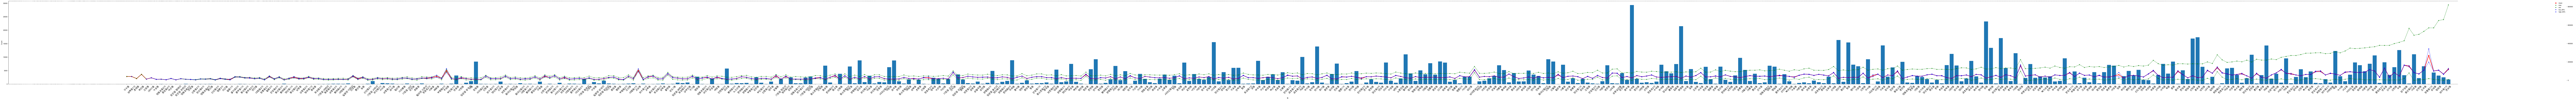

In [65]:
X = groupby_df1.index
y = groupby_df1

fig, ax1 = plt.subplots(figsize=(300,10))
plt.xticks(rotation=45, fontsize=15)
ax1.set_xlabel('동')
ax1.set_ylabel('Count')
ax2 = ax1.twinx()
ax2.set_ylabel('Price')


ax2.plot(X, y['mean'],label='mean', color='r', marker='o',linewidth=3)
ax2.plot(X, y['max'], label='max', color='g', marker='*',linewidth=1)
ax2.plot(X, y['min'], label='min', color='g', marker='*',linewidth=1)
ax2.plot(X, y['low'], label='low_95%', color='b', marker='*',linewidth=1)
ax2.plot(X, y['high'], label='high_95%', color='b', marker='*',linewidth=1)
ax1.bar(X, y['count'])

plt.legend()

plt.show()

In [66]:
#신뢰구간 95%를 설정해 동별 가격을 보았을때 2곳에서 신뢰구간이 포함이 되지 않음을 발견했다.

In [67]:
groupby_df1.loc["주성동"].reset_index()

index            주성동
0               max  117000.000000
1              mean  106000.000000
2               min   95000.000000
3               std   15556.349186
4              sort   22000.000000
5             count       2.000000
6  Score_squareroot       1.414214
7               low   84440.000000
8              high  127560.000000

In [68]:
(groupby_df1.loc["주성동"]['max'])-(groupby_df1.loc["주성동"]['min']) > (groupby_df1.loc["주성동"]['high'])-(groupby_df1.loc["주성동"]['low'])

False

In [69]:
groupby_df1.loc["교남동"].reset_index()

index            교남동
0               max  124500.000000
1              mean  108600.000000
2               min   96500.000000
3               std   14381.585448
4              sort   28000.000000
5             count       3.000000
6  Score_squareroot       1.732051
7               low   92325.704030
8              high  124874.295970

In [70]:
(groupby_df1.loc["교남동"]['max'])-(groupby_df1.loc["교남동"]['min']) > (groupby_df1.loc["교남동"]['high'])-(groupby_df1.loc["교남동"]['low'])

False

# 새로운 변수를 추가해보자

## 공원 Data

In [75]:
park.tail() #train data와  park data는 시와 동을 엮어 분석을 진행할 예정이다.

city   gu dong  park_name park_type  park_area park_exercise_facility  \
1354  서울특별시  구로구  천왕동  이펜시아어린이공원     어린이공원     1500.0                    NaN   
1355  서울특별시  구로구  천왕동      개명소공원       소공원     5415.0                    NaN   
1356  서울특별시  구로구  천왕동    봉화대근린공원      근린공원    60975.0                    NaN   
1357  서울특별시  구로구   항동      푸른수목원      근린공원   100809.0                    NaN   
1358  서울특별시  구로구  오류동   오류동역문화공원      문화공원     7510.0                    NaN   

     park_entertainment_facility park_benefit_facility park_cultural_facitiy  \
1354                     조합놀이 1기                   NaN                   NaN   
1355                         NaN                   NaN                   NaN   
1356                         NaN                   NaN                   NaN   
1357                         NaN                   NaN                   NaN   
1358                         NaN                   NaN                   NaN   

     park_facility_other  park_open_year reference_date  
1354                 NaN          2006.0     2019-02-25  
1355                 NaN          2006.0     2019-02-25  
1356                 NaN          2006.0     2019-02-25  
1357                 NaN          2005.0     2019-02-25  
1358                 NaN          2013.0     2019-02-25

In [77]:
park.info() # 공원 Datad에 null 값이 많다. 대략적으로 보니 각 공원별로 장비의 유무를 나타내는 것 같다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         1359 non-null   object 
 1   gu                           1356 non-null   object 
 2   dong                         1359 non-null   object 
 3   park_name                    1359 non-null   object 
 4   park_type                    1359 non-null   object 
 5   park_area                    1359 non-null   float64
 6   park_exercise_facility       277 non-null    object 
 7   park_entertainment_facility  435 non-null    object 
 8   park_benefit_facility        266 non-null    object 
 9   park_cultural_facitiy        72 non-null     object 
 10  park_facility_other          175 non-null    object 
 11  park_open_year               937 non-null    float64
 12  reference_date               1359 non-null   object 
dtypes: float64(2), obj

In [87]:
park_df = pd.DataFrame(park, columns=["city","gu","dong","park_name","park_type","park_area","park_exercise_facility",
                                      "park_entertainment_facility","park_benefit_facility","park_cultural_facitiy","park_facility_other","park_open_year","reference_date"])
park_df.tail()

city   gu dong  park_name park_type  park_area park_exercise_facility  \
1354  서울특별시  구로구  천왕동  이펜시아어린이공원     어린이공원     1500.0                    NaN   
1355  서울특별시  구로구  천왕동      개명소공원       소공원     5415.0                    NaN   
1356  서울특별시  구로구  천왕동    봉화대근린공원      근린공원    60975.0                    NaN   
1357  서울특별시  구로구   항동      푸른수목원      근린공원   100809.0                    NaN   
1358  서울특별시  구로구  오류동   오류동역문화공원      문화공원     7510.0                    NaN   

     park_entertainment_facility park_benefit_facility park_cultural_facitiy  \
1354                     조합놀이 1기                   NaN                   NaN   
1355                         NaN                   NaN                   NaN   
1356                         NaN                   NaN                   NaN   
1357                         NaN                   NaN                   NaN   
1358                         NaN                   NaN                   NaN   

     park_facility_other  park_open_year reference_date  
1354                 NaN          2006.0     2019-02-25  
1355                 NaN          2006.0     2019-02-25  
1356                 NaN          2006.0     2019-02-25  
1357                 NaN          2005.0     2019-02-25  
1358                 NaN          2013.0     2019-02-25

In [121]:
park_rank = (park_df.groupby('dong')['park_area'].agg(['sum'])).sort_values(by='sum', ascending=False)
park_rank.head(10)

sum
dong             
초읍동     9956116.3
상계동     6692795.0
온천동     6346071.7
중계동     5334267.0
영주동     5249896.0
진관동     2956693.3
면목동     2801845.8
장전동     2332959.4
서대신동3가  2104835.0
용호동     1962663.0

In [ ]:
# 새로운 x 값이 생겼다. 집값과의 상관관계를 밝혀보자

In [154]:
pd.pivot_table(park_df, index='dong',aggfunc="sum")[['park_area']].reset_index()

dong  park_area
0    가락동   102882.4
1    가산동     3650.6
2    가야동    72762.0
3    가양동   228304.5
4    갈현동     8312.8
..   ...        ...
232  회동동     9189.2
233  효창동   171802.0
234  후암동     2522.0
235  휘경동     6965.9
236  흑석동     2899.7

[237 rows x 2 columns]

In [181]:
park_count = park_df.groupby(['dong'])["park_area"].count().reset_index()

In [177]:
corr_park_count = pd.merge(park_count, df1)

In [179]:
park_sum = pd.merge(pd.pivot_table(park_df, index='dong')[['park_area']].reset_index(), df1)

In [180]:
np.corrcoef(park_sum['park_area'], park_sum['transaction_real_price'])[0,1]

-0.07456779776004183

In [178]:
np.corrcoef(corr_park_count['park_area'], corr_park_count['transaction_real_price'])[0,1]

0.09527464647645044

# 회귀분석을 해보자

In [30]:
from sklearn import linear_model

In [31]:
data = {'x1':df1["exclusive_use_area"],
        'x2':df1['year_of_completion'],
        'x3':df1['floor'],
       'y': df1['transaction_real_price']}

data = pd.DataFrame(data)

X = data[['x1','x2','x3']]
y = data['y']
data

x1    x2  x3       y
0         84.8200  2002   2   37500
1         99.1700  1973   6   20000
2         84.7400  2007   6   38500
3        146.3900  2003  15  118000
4        194.4300  2004   3  120000
...           ...   ...  ..     ...
1216548   59.8245  2012   3   22000
1216549   84.9923  2012   7   30750
1216550   84.9923  2012   9   29500
1216551  101.7400  2008   7   26700
1216552   84.9923  2012  16   28800

[1216553 rows x 4 columns]

In [32]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  367125.74435636285
b value =  [ 600.79221323 -189.17876198  232.89458693]


In [33]:
residuals = y-prediction
residuals.describe()

count    1.216553e+06
mean     5.199438e-10
std      2.561390e+04
min     -1.310784e+05
25%     -1.443174e+04
50%     -3.222709e+03
75%      8.439068e+03
max      6.855708e+05
Name: y, dtype: float64

In [34]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.3194554604195421


In [35]:
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X =pd.DataFrame(X), y=y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.3194554604195421
Mean_Squared_Error =  656071224.025548
RMSE =  25613.88732749381


## dtype이 str인 데이터 중 동의 이름으로 평균치를 줘서 만들어보기

In [36]:
avg_ppm2 = df1.groupby('dong').mean()['P/m^2']

In [37]:
avg_ppm2 = pd.DataFrame(avg_ppm2)

In [38]:
avg_ppm2.sort_values('P/m^2')

P/m^2
dong                
중앙동4가     105.928573
신선동3가     109.488959
봉래동5가     109.880225
기장읍 대변리   111.550869
신선동2가     117.630164
...              ...
대치동      1199.884182
잠실동      1211.334003
반포동      1286.040375
압구정동     1401.278173
개포동      1510.770589

[473 rows x 1 columns]

In [39]:
a = df1.groupby('dong').mean()[['P/m^2']]

In [40]:
ppm2 = pd.DataFrame(train['dong'].replace(a.index,a['P/m^2']))
ppm2

dong
0        544.885981
1        604.738361
2        604.738361
3        781.025430
4        781.025430
...             ...
1216548  261.243529
1216549  261.243529
1216550  261.243529
1216551  261.243529
1216552  261.243529

[1216553 rows x 1 columns]

In [41]:
data = {'x1':df1["exclusive_use_area"],
        'x2':df1['year_of_completion'],
        'x3':df1['floor'],
        'x4':ppm2['dong'],
       'y': df1['transaction_real_price']}

data = pd.DataFrame(data)

X = data[['x1','x2','x3','x4']]
y = data['y']
data

x1    x2  x3          x4       y
0         84.8200  2002   2  544.885981   37500
1         99.1700  1973   6  604.738361   20000
2         84.7400  2007   6  604.738361   38500
3        146.3900  2003  15  781.025430  118000
4        194.4300  2004   3  781.025430  120000
...           ...   ...  ..         ...     ...
1216548   59.8245  2012   3  261.243529   22000
1216549   84.9923  2012   7  261.243529   30750
1216550   84.9923  2012   9  261.243529   29500
1216551  101.7400  2008   7  261.243529   26700
1216552   84.9923  2012  16  261.243529   28800

[1216553 rows x 5 columns]

In [42]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  -195411.19281250596
b value =  [506.75493406  76.03645375 346.16387539  80.48932253]


In [43]:
residuals = y-prediction
residuals.describe()

count    1.216553e+06
mean     1.256376e-10
std      1.543106e+04
min     -1.599812e+05
25%     -6.458604e+03
50%     -1.947259e+02
75%      5.895881e+03
max      6.591594e+05
Name: y, dtype: float64

In [44]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.753000279857136


In [45]:
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X =pd.DataFrame(X), y=y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.753000279857136
Mean_Squared_Error =  238117271.24869266
RMSE =  15431.04893546426


In [46]:
# x3(층수) 데이터 삭제

In [47]:
data = {'x1':df1["exclusive_use_area"],
        'x2':df1['year_of_completion'],
        'x4':ppm2['dong'],
       'y': df1['transaction_real_price']}

data = pd.DataFrame(data)

X = data[['x1','x2','x4']]
y = data['y']
data

x1    x2          x4       y
0         84.8200  2002  544.885981   37500
1         99.1700  1973  604.738361   20000
2         84.7400  2007  604.738361   38500
3        146.3900  2003  781.025430  118000
4        194.4300  2004  781.025430  120000
...           ...   ...         ...     ...
1216548   59.8245  2012  261.243529   22000
1216549   84.9923  2012  261.243529   30750
1216550   84.9923  2012  261.243529   29500
1216551  101.7400  2008  261.243529   26700
1216552   84.9923  2012  261.243529   28800

[1216553 rows x 4 columns]

In [48]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  -306637.0241871498
b value =  [514.66753024 133.0798739   80.18265529]


In [49]:
residuals = y-prediction
residuals.describe()

count    1.216553e+06
mean     8.345414e-12
std      1.558795e+04
min     -1.619859e+05
25%     -6.539970e+03
50%     -1.340779e+02
75%      5.977975e+03
max      6.550711e+05
Name: y, dtype: float64

In [50]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.7479521248895913


In [51]:
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X =pd.DataFrame(X), y=y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.7479521248895913
Mean_Squared_Error =  242983887.636019
RMSE =  15587.94045523715


### 계산해보자

In [52]:
data = {'x1':df1["exclusive_use_area"],
        'x3':df1['floor'],
        'x4':ppm2['dong'],
       'y': df1['transaction_real_price']}

data = pd.DataFrame(data)

X = data[['x1','x3','x4']]
y = data['y']
data

x1  x3          x4       y
0         84.8200   2  544.885981   37500
1         99.1700   6  604.738361   20000
2         84.7400   6  604.738361   38500
3        146.3900  15  781.025430  118000
4        194.4300   3  781.025430  120000
...           ...  ..         ...     ...
1216548   59.8245   3  261.243529   22000
1216549   84.9923   7  261.243529   30750
1216550   84.9923   9  261.243529   29500
1216551  101.7400   7  261.243529   26700
1216552   84.9923  16  261.243529   28800

[1216553 rows x 4 columns]

In [53]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  -43815.949597503764
b value =  [510.26991428 368.62520872  80.2065849 ]


In [54]:
residuals = y-prediction
residuals.describe()

count    1.216553e+06
mean     3.616419e-11
std      1.544469e+04
min     -1.601884e+05
25%     -6.468807e+03
50%     -2.196643e+02
75%      5.923936e+03
max      6.598208e+05
Name: y, dtype: float64

In [55]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.7525636607230297


In [56]:
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X =pd.DataFrame(X), y=y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.7525636607230297
Mean_Squared_Error =  238538188.95956388
RMSE =  15444.681575207818


In [57]:
# x1 제외해보기

In [58]:
data = {'x2':df1['year_of_completion'],
        'x3':df1['floor'],
        'x4':ppm2['dong'], 
       'y': df1['transaction_real_price']}

data = pd.DataFrame(data)

X = data[['x2','x3','x4']]
y = data['y']
data

x2  x3          x4       y
0        2002   2  544.885981   37500
1        1973   6  604.738361   20000
2        2007   6  604.738361   38500
3        2003  15  781.025430  118000
4        2004   3  781.025430  120000
...       ...  ..         ...     ...
1216548  2012   3  261.243529   22000
1216549  2012   7  261.243529   30750
1216550  2012   9  261.243529   29500
1216551  2008   7  261.243529   26700
1216552  2012  16  261.243529   28800

[1216553 rows x 4 columns]

In [59]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  -678349.4042633657
b value =  [334.67991084 575.42350641  87.86605184]


In [60]:
residuals = y-prediction
residuals.describe()

count    1.216553e+06
mean    -3.705153e-10
std      2.108406e+04
min     -1.179714e+05
25%     -9.260251e+03
50%     -1.561458e+03
75%      6.222300e+03
max      7.381317e+05
Name: y, dtype: float64

In [61]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.5388801454424201


In [62]:
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X =pd.DataFrame(X), y=y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

score =  0.5388801454424201
Mean_Squared_Error =  444537351.7926927
RMSE =  21084.054443884666


### 계산해보자
 - 혹시 과적합은 아닐까 생각해서 test 데이터를 데이콘에 제출해보았다.

In [63]:
data = {'x1':df1["exclusive_use_area"],
        'x2':df1['year_of_completion'],
        'x3':df1['floor'],
        'x4':ppm2['dong'],
       'y': df1['transaction_real_price']}

data = pd.DataFrame(data)

X = data[['x1','x2','x3','x4']]
y = data['y']
data

x1    x2  x3          x4       y
0         84.8200  2002   2  544.885981   37500
1         99.1700  1973   6  604.738361   20000
2         84.7400  2007   6  604.738361   38500
3        146.3900  2003  15  781.025430  118000
4        194.4300  2004   3  781.025430  120000
...           ...   ...  ..         ...     ...
1216548   59.8245  2012   3  261.243529   22000
1216549   84.9923  2012   7  261.243529   30750
1216550   84.9923  2012   9  261.243529   29500
1216551  101.7400  2008   7  261.243529   26700
1216552   84.9923  2012  16  261.243529   28800

[1216553 rows x 5 columns]

In [64]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)

a value =  -195411.19281250596
b value =  [506.75493406  76.03645375 346.16387539  80.48932253]


In [65]:
residuals = y-prediction
residuals.describe()

count    1.216553e+06
mean     1.256376e-10
std      1.543106e+04
min     -1.599812e+05
25%     -6.458604e+03
50%     -1.947259e+02
75%      5.895881e+03
max      6.591594e+05
Name: y, dtype: float64

In [66]:
prediction = linear_regression.predict(X = pd.DataFrame(X))

In [67]:
test = pd.read_csv('datas/test.csv')

In [68]:
test_ppm2 = pd.DataFrame(test['dong'].replace(a.index,a['P/m^2']))

In [69]:
data = {'x1':test["exclusive_use_area"],
        'x2':test['year_of_completion'],
        'x3':test['floor'],
        'x4':test_ppm2['dong'], 
       }

data = pd.DataFrame(data)

X = data[['x1','x2','x3','x4']]

data

x1    x2  x3           x4
0      35.5500  2002   2   787.785396
1      68.7200  1977   2   268.031738
2      72.5400  1989   2   200.954587
3     111.5400  2004  10  1199.884182
4     119.6398  2014  21   205.451798
...        ...   ...  ..          ...
5458   84.0500  2003   7   666.855599
5459   84.9300  2009   4  1286.040375
5460  110.1880  2004  23   462.939627
5461   92.4400  2005   1   463.092441
5462   84.6400  1993   7   275.617148

[5463 rows x 4 columns]

In [70]:
prediction = linear_regression.predict(X = pd.DataFrame(X))

In [71]:
prediction = pd.DataFrame(prediction)

In [72]:
prediction

0
0      38929.566121
1      12003.096093
2       9452.342939
3     113528.809515
4      42160.401395
...             ...
5458   55580.478767
5459  105281.913398
5460   58027.639262
5461   41506.483800
5462   23628.581770

[5463 rows x 1 columns]

In [73]:
Sol = pd.concat([pd.read_csv('datas/submission.csv'), prediction], axis=1)

In [74]:
Sol

transaction_id  transaction_real_price              0
0            1145756                       0   38929.566121
1            1198704                       0   12003.096093
2            1222384                       0    9452.342939
3            1179897                       0  113528.809515
4            1223091                       0   42160.401395
...              ...                     ...            ...
5458         1174640                       0   55580.478767
5459         1175575                       0  105281.913398
5460         1157024                       0   58027.639262
5461         1136863                       0   41506.483800
5462         1218921                       0   23628.581770

[5463 rows x 3 columns]

In [75]:
Sol = Sol.drop(columns='transaction_real_price')

In [76]:
Sol = Sol.rename(columns={0:'transaction_real_price'})

In [77]:
Sol.set_index('transaction_id')

transaction_real_price
transaction_id                        
1145756                   38929.566121
1198704                   12003.096093
1222384                    9452.342939
1179897                  113528.809515
1223091                   42160.401395
...                                ...
1174640                   55580.478767
1175575                  105281.913398
1157024                   58027.639262
1136863                   41506.483800
1218921                   23628.581770

[5463 rows x 1 columns]

In [78]:
Sol.to_csv('datas/Sol1.csv',encoding='UTF-8')

 <img src="./datas/dacon.png" style="width:150%;">

# 이후 목표

 <img src="./datas/csv.png" style="width:100%;">

 <img src="./datas/sgis.png" style="width:100%;">

 <img src="./datas/sdc.png" style="width:100%;">

 <img src="./datas/bdc.png" style="width:100%;">